<a href="https://colab.research.google.com/github/esn73/lab_python/blob/master/py22_seaborn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

tips 데이터 셋

In [3]:
tips = sns.load_dataset('tips')

In [5]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


# Box plot

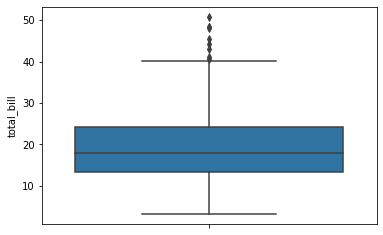

In [20]:
# total_bill box plot
sns.boxplot(y='total_bill', data=tips)
plt.show()

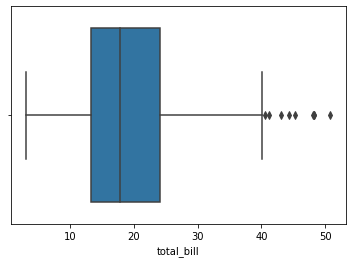

In [21]:
sns.boxplot(x='total_bill', data=tips)
plt.show()

성별 tip의 분포 시각화

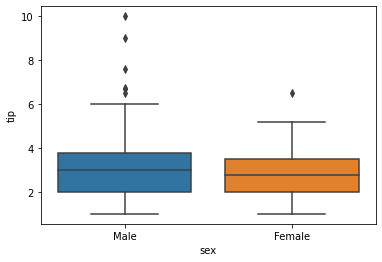

In [22]:
sns.boxplot(y='tip', data=tips, x='sex')
plt.show()

In [23]:
tip_male = tips[tips['sex'] == 'Male']
tip_male['tip'].describe()

count    157.000000
mean       3.089618
std        1.489102
min        1.000000
25%        2.000000
50%        3.000000
75%        3.760000
max       10.000000
Name: tip, dtype: float64

In [24]:
tip_Female = tips[tips['sex'] == 'Female']
tip_Female['tip'].describe()

count    87.000000
mean      2.833448
std       1.159495
min       1.000000
25%       2.000000
50%       2.750000
75%       3.500000
max       6.500000
Name: tip, dtype: float64

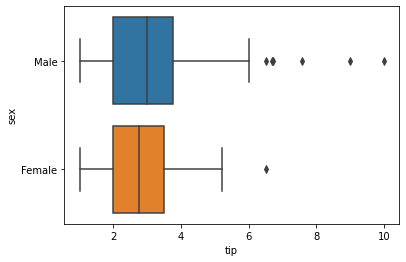

In [25]:
sns.boxplot(x='tip', y='sex', data=tips)
plt.show()

요일별 tip의 box plot

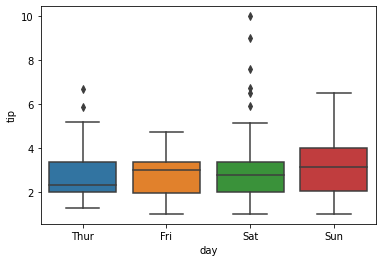

In [27]:
sns.boxplot(x='day', y='tip', data=tips)
plt.show()

* subplot 2개(1x2)를 생성
* 흡연여부별, 시간별 boxplot

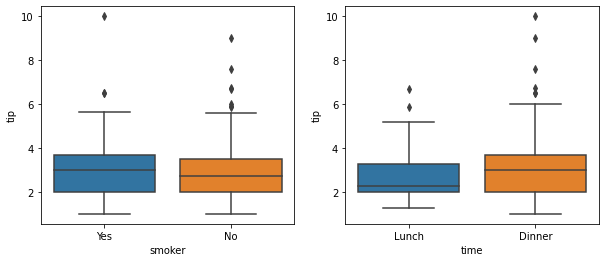

In [36]:
fig, ax = plt.subplots(ncols=2, figsize=(10, 4)) ## pyplot을 사용해야함

sns.boxplot(x='smoker', y='tip', data=tips, ax=ax[0])
sns.boxplot(x='time', y='tip', data=tips, ax=ax[1])

plt.show()